<a href="https://colab.research.google.com/github/bforoura/IDS/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 3: Analysis Techniques**

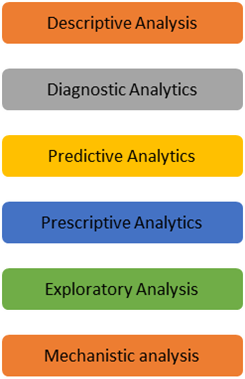

### **Descriptive Analytics**

* What is happening now based on incoming data? 

* It is a method for quantitatively describing the main features of a collection of data. 

* Typically, it is the ﬁrst kind of data analysis performed on a dataset.

* Usually it is applied to large volumes of data, such as census data.

* Description and interpretation processes are different steps.

* Analysts collect quantitative data or translate qualitative data into numbers using large volumes of raw data that needs to be organized and summarized before it can be analyzed. 

**Example**: Census data is a way to describe a population

In [3]:
# pandas is a software library written for the Python programming language for data manipulation and analysis. 
# In particular, it offers data structures and operations for manipulating numerical tables and time series. 

import pandas as pd

In [4]:
pip install censusdata

     |████████████████████████████████| 26.6 MB 1.6 MB/s 
  Created wheel for censusdata: filename=CensusData-1.15-py3-none-any.whl size=28205534 sha256=48883ae6e4cd222f3c72e9a9cab5c7b49e3d34d8c465d57cf869c1403f384771
  Stored in directory: /root/.cache/pip/wheels/17/11/8c/933901298f486bd414f2ab1a62a114085f7d7a19dcbda2dd08
Successfully built censusdata


In [5]:
import censusdata

In [15]:
# Tabulate is an open-source python package/module which is used to print tabular data in nicely formatted tables. 
# It is easy to use and contains a variety of formatting functions.

from tabulate import tabulate

In [16]:
# DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. 
# You can think of it like a spreadsheet or SQL table, or a dict of Series objects. 
# It is generally the most commonly used pandas object.

censusDF = censusdata.download('acs5', 
           2015,
           censusdata.censusgeo([('state', '36'), ('county', '*')]),
           ['B08301_001E', 'B08301_010E'])

* **acs5** refers to the 5 Year American Community Survey and designates the database we are downloading from.
* 2015 is the year that we are getting data from
* censusdata.censusgeo([(**‘state’**, ‘36’), (**‘county’**, ‘*’)]) defines the geography we are interested in. 
* The ‘36’ value is the FIPS (Federal Information Processing Standards) code for New York state while the ‘*’ means we want every county. 
* To look up your own state or county FIPS code refer to the Wikipedia page.
* [‘B08301_001E’, ‘B08301_010E’]  is a list referring to the specific two tables that we are interested in. 

In [17]:
# Let's examine the contents of the datafarme in various formats

print(tabulate(censusDF, headers='keys', tablefmt='psql'))



+-------------------------------------------------------------------------+------------------+---------------+
|                                                                         |      B08301_001E |   B08301_010E |
|-------------------------------------------------------------------------+------------------+---------------|
| Schoharie County, New York: Summary level: 050, state:36> county:095    |  13742           |           200 |
| Fulton County, New York: Summary level: 050, state:36> county:035       |  23546           |           141 |
| Rensselaer County, New York: Summary level: 050, state:36> county:083   |  78398           |          1757 |
| Franklin County, New York: Summary level: 050, state:36> county:033     |  19534           |           136 |
| Queens County, New York: Summary level: 050, state:36> county:081       |      1.07675e+06 |        562857 |
| Washington County, New York: Summary level: 050, state:36> county:115   |  27979           |           240 |
|

In [18]:
# Pretty print a data frame in grid format

print(tabulate(censusDF, headers='keys', tablefmt='fancy_grid'))


╒═════════════════════════════════════════════════════════════════════════╤══════════════════╤═══════════════╕
│                                                                         │      B08301_001E │   B08301_010E │
╞═════════════════════════════════════════════════════════════════════════╪══════════════════╪═══════════════╡
│ Schoharie County, New York: Summary level: 050, state:36> county:095    │  13742           │           200 │
├─────────────────────────────────────────────────────────────────────────┼──────────────────┼───────────────┤
│ Fulton County, New York: Summary level: 050, state:36> county:035       │  23546           │           141 │
├─────────────────────────────────────────────────────────────────────────┼──────────────────┼───────────────┤
│ Rensselaer County, New York: Summary level: 050, state:36> county:083   │  78398           │          1757 │
├─────────────────────────────────────────────────────────────────────────┼──────────────────┼───────────────┤
│

In [20]:
# Another example of creating a data frame from a dictionary and printing it

usersDF = pd.DataFrame({
                 'username' :   ['Jack','Jill','Pam','Sam'],
                 'passwd':      [1111, 2222, 3333, 4444],
                 'dept':        ['CSC','MAT','DSS','ART']})
# Display the Dataframe
print(usersDF)

  username  passwd dept
0     Jack    1111  CSC
1     Jill    2222  MAT
2      Pam    3333  DSS
3      Sam    4444  ART


In [21]:
print(tabulate(usersDF, headers='keys', tablefmt='fancy_grid'))

╒════╤════════════╤══════════╤════════╕
│    │ username   │   passwd │ dept   │
╞════╪════════════╪══════════╪════════╡
│  0 │ Jack       │     1111 │ CSC    │
├────┼────────────┼──────────┼────────┤
│  1 │ Jill       │     2222 │ MAT    │
├────┼────────────┼──────────┼────────┤
│  2 │ Pam        │     3333 │ DSS    │
├────┼────────────┼──────────┼────────┤
│  3 │ Sam        │     4444 │ ART    │
╘════╧════════════╧══════════╧════════╛


# Let's prepare to import a data table from MySQL


In [22]:
pip install mysql-connector-python

     |████████████████████████████████| 37.6 MB 1.2 MB/s 


In [23]:
import mysql.connector as sql

In [24]:
# use the same credentials you use to connect to MySQL via Workbench

db_connection = sql.connect(host='208.109.18.154', database='ids1db', user='ids1', password='')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM chickwts')

table_rows = db_cursor.fetchall()

chickDF = pd.DataFrame(table_rows)

print(tabulate(chickDF, headers='keys', tablefmt='fancy_grid'))

╒════╤═════╤═════╤═══════════╕
│    │   0 │   1 │ 2         │
╞════╪═════╪═════╪═══════════╡
│  0 │   1 │ 179 │ horsebean │
├────┼─────┼─────┼───────────┤
│  1 │   2 │ 160 │ horsebean │
├────┼─────┼─────┼───────────┤
│  2 │   3 │ 136 │ horsebean │
├────┼─────┼─────┼───────────┤
│  3 │   4 │ 227 │ horsebean │
├────┼─────┼─────┼───────────┤
│  4 │   5 │ 217 │ horsebean │
├────┼─────┼─────┼───────────┤
│  5 │   6 │ 168 │ horsebean │
├────┼─────┼─────┼───────────┤
│  6 │   7 │ 108 │ horsebean │
├────┼─────┼─────┼───────────┤
│  7 │   8 │ 124 │ horsebean │
├────┼─────┼─────┼───────────┤
│  8 │   9 │ 143 │ horsebean │
├────┼─────┼─────┼───────────┤
│  9 │  10 │ 140 │ horsebean │
├────┼─────┼─────┼───────────┤
│ 10 │  11 │ 309 │ linseed   │
├────┼─────┼─────┼───────────┤
│ 11 │  12 │ 229 │ linseed   │
├────┼─────┼─────┼───────────┤
│ 12 │  13 │ 181 │ linseed   │
├────┼─────┼─────┼───────────┤
│ 13 │  14 │ 141 │ linseed   │
├────┼─────┼─────┼───────────┤
│ 14 │  15 │ 260 │ linseed   │
├────┼──

In [26]:
# get some information about the columns in the dataframe
chickDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       71 non-null     int64 
 1   1       71 non-null     int64 
 2   2       71 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


In [32]:
# display the first 10 rows
chickDF.head(10)

,0,1,2
0,1,179,horsebean
1,2,160,horsebean
2,3,136,horsebean
3,4,227,horsebean
4,5,217,horsebean
5,6,168,horsebean
6,7,108,horsebean
7,8,124,horsebean
8,9,143,horsebean
9,10,140,horsebean


In [44]:
# Let’s find out what categories exist in column 2 and how many districts belong to it by using the value_counts() method

chickDF[2].value_counts()

soybean      14
linseed      12
sunflower    12
casein       12
meatmeal     11
horsebean    10
Name: 2, dtype: int64

In [45]:
# Let's find the min of the weights column

chickDF[1].min()

108

In [42]:
# Let's create a new dataframe and summarize the wieghts column with a few statistical moments

chickSummaryDF = pd.DataFrame({
                 'Min' :   [chickDF[1].min()],
                 'Max':    [chickDF[1].max()],
                 'Mean':   [chickDF[1].mean()],
                 'STD':    [chickDF[1].std()],
                 'Var':    [chickDF[1].var()], 
                 })

# Display the Summary Dataframe
print(tabulate(chickSummaryDF, headers='keys', tablefmt='fancy_grid'))

╒════╤═══════╤═══════╤════════╤═════════╤════════╕
│    │   Min │   Max │   Mean │     STD │    Var │
╞════╪═══════╪═══════╪════════╪═════════╪════════╡
│  0 │   108 │   423 │ 261.31 │ 78.0737 │ 6095.5 │
╘════╧═══════╧═══════╧════════╧═════════╧════════╛


**References**
* https://towardsdatascience.com/mapping-us-census-data-with-python-607df3de4b9c
* https://thispointer.com/pretty-print-a-pandas-dataframe/#psql-format
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
